# CMB-PAInT usage example: #

**This is an example notebook where we will go step by step showing how to call the different functions of the package. We start focusing on the intensity case, and then we go for polarization case.**

## Intensity case:  ##

**We start importing the package**

In [1]:
import CMB_PAInT as CMBP

**We select the configuration parameters. Global_Path specify the path to the folder where CMB_PAInT.py is located:**

In [2]:
Cls = "./docs/Cls_TT_ns_16_fwhm_640.npy"
Nside = 16
Lmax = 48
Out_PATH = "./docs/example_matrix/intensity/"
Inp_In_PATH = "./docs/"
Inp_Out_PATH = "./docs/example_inpainted_maps/intensity/"
In_Name = "example_map_T.fits"
Num_Sims = 20
Single = True
No_Z = False
Cons_Uncons = True
Fields = 3
Zbar_PATH = None
I_Mask = "./docs/example_masks/example_I_mask.fits"
Chunks = 96
job_name = None
env = None
Noise_Level = 0.00001
DP = True
local = True
ntasks_cov = 4
P_Mask = None
ntasks_inp = 4

Global_Path = "/media/christian98/Seagate/Doctorado/Proyectos/Inpainting/CMBPAInT/CMBPAInT/"

**Generate an instance of CMB_PAInT class:**

In [3]:
Inpainting_Data = CMBP.CMB_PAInT(Cls, Nside, Lmax, Out_PATH, Inp_In_PATH, Inp_Out_PATH, In_Name, Num_Sims, Single, No_Z, Cons_Uncons, Fields, Zbar_PATH, I_Mask, Chunks, job_name, env, Noise_Level = Noise_Level, DP = DP, local = local, ntasks_cov = ntasks_cov, P_Mask = P_Mask, ntasks_inp = ntasks_inp)

Total number of pixels:  (3072,)
Number of masked pixels:  1091


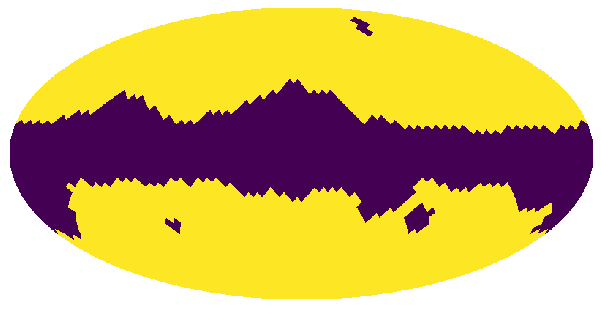

In [5]:
import healpy as hp
import numpy as np

Mask = hp.read_map(I_Mask)
print("Total number of pixels: ", Mask.shape)
print("Number of masked pixels: ", len(np.where(Mask == 0)[0]))
hp.mollview(Mask, title = "", cbar = False)

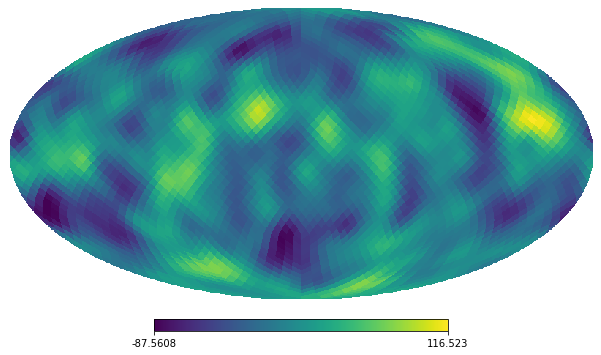

In [26]:
import os

Map = hp.read_map(os.path.join(Inp_In_PATH, In_Name))
hp.mollview(Map, title = "")

**We generate the configuration file in the folder where covariance matrix will be computed:**

In [7]:
Inpainting_Data.generate_config_file()

### Compute covariance matrix: ###

In [8]:
Inpainting_Data.calculate_covariance_matrix(global_path = Global_Path)

























  0%|          | 0/768 [00:00<?, ?it/s]

Number of processes:  4
Pol:  False
TPol:  False
768


 83%|████████▎ | 641/768 [00:00<00:00, 1493.27it/s]

MPI Task 0/4: Memory usage = 166.38 MB
MPI Task 1/4: Memory usage = 169.41 MB
MPI Task 2/4: Memory usage = 174.68 MB
MPI Task 3/4: Memory usage = 178.88 MB


100%|██████████| 768/768 [00:01<00:00, 609.51it/s] 


**Load pixel covariance matrix:**

In [11]:
Matrix = np.load(os.getcwd()+"/docs/example_matrix/intensity/Cov_TT_lmax_48.npy")
Matrix

array([[1422.14523003,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       [1343.80455374, 1422.14523003,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       [1272.7491114 , 1343.80455374, 1422.14523003, ...,    0.        ,
           0.        ,    0.        ],
       ...,
       [ 248.76765106,  247.44534008,  248.76765106, ..., 1422.14523003,
           0.        ,    0.        ],
       [ 250.09099317,  248.76765106,  247.44534008, ..., 1343.80455374,
        1422.14523003,    0.        ],
       [ 248.76765106,  250.09099317,  248.76765106, ..., 1272.7491114 ,
        1343.80455374, 1422.14523003]])

**We add regularization noise to the input map (0.00001% of the matrix diagonal element):**

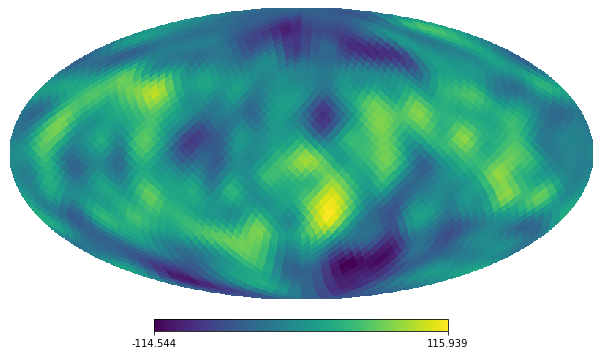

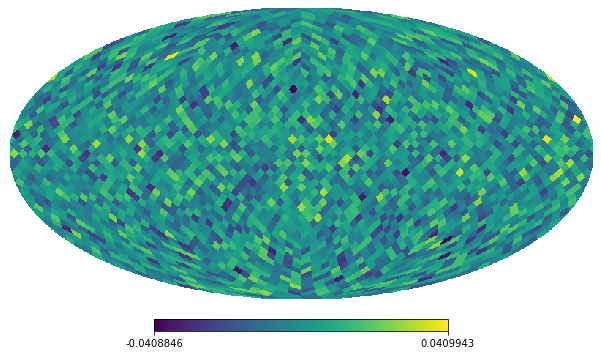

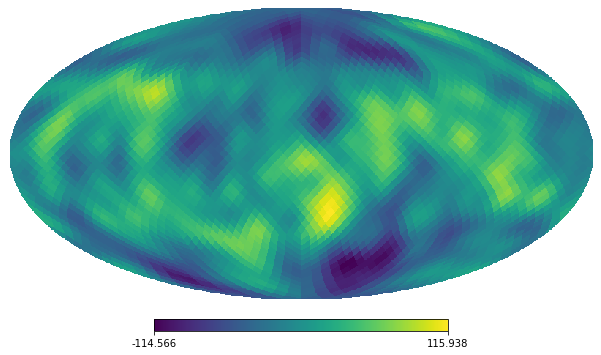

In [13]:
Var_T = Matrix[0, 0]
npix = hp.nside2npix(16)

Reg_Noise = np.random.normal(0, np.sqrt(0.00001/100*Var_T), npix)

Input_Map = hp.read_map(os.getcwd()+"/docs/example_map_T.fits")

Inp_Map = Input_Map+Reg_Noise

hp.mollview(Input_Map, title = "")
hp.mollview(Reg_Noise, title = "")
hp.mollview(Inp_Map, title = "")

hp.write_map(os.getcwd()+"/docs/example_map_T_adding_reg_noise.fits", Inp_Map, dtype = np.float64, overwrite = True)

### Compute Cholesky decomposition: ###

In [14]:
Inpainting_Data.calculate_chol(global_path = Global_Path)







/home/christian98/miniconda3/envs/Doctorado/lib/python3.7/site-packages/dask/array/core.py:4465: PerformanceWarning: Increasing number of chunks by factor of 33
  **blockwise_kwargs,
/home/christian98/miniconda3/envs/Doctorado/lib/python3.7/site-packages/dask/array/core.py:4465: PerformanceWarning: Increasing number of chunks by factor of 33
  **blockwise_kwargs,


Precision: double


### Inpaint maps: ###

In [15]:
Inpainting_Data.calculate_inp(global_path = Global_Path)

Single sky. Number of realizations:  20
L block reading...
MPI Task 1/4: Memory usage = 203.30 MB
L block reading...
MPI Task 3/4: Memory usage = 203.29 MB
L block reading...
MPI Task 0/4: Memory usage = 203.99 MB
L block reading...
MPI Task 2/4: Memory usage = 203.55 MB
Starting Z computation...
Z computation done!
R and Lbar blocks reading...
MPI Task 0/4: Memory usage = 199.06 MB
R and Lbar blocks reading...
MPI Task 3/4: Memory usage = 198.14 MB
R and Lbar blocks reading...
MPI Task 1/4: Memory usage = 198.38 MB
R and Lbar blocks reading...
MPI Task 2/4: Memory usage = 198.68 MB
Starting inpainting...


100%|██████████| 5/5 [00:00<00:00, 39.62it/s]


Inpainting done!


### Plot some maps: ###

In [18]:
Inpainted_Map_0 = hp.read_map(os.getcwd()+"/docs/example_inpainted_maps/intensity/Inpainted_Maps/Inpainted_T_0.fits", field = (0, 1, 2))
Inpainted_Map_10 = hp.read_map(os.getcwd()+"/docs/example_inpainted_maps/intensity/Inpainted_Maps/Inpainted_T_10.fits", field = (0, 1, 2))
Input = hp.read_map(os.getcwd()+"/docs/example_map_T_adding_reg_noise.fits")

**Plotting constrained part (first term in right side of eq. 2.13 in the [paper](https://arxiv.org/abs/2405.06820))**

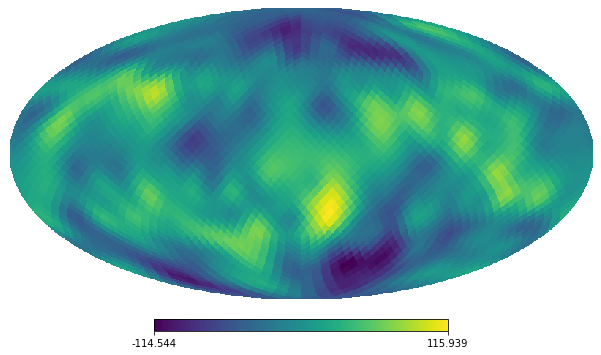

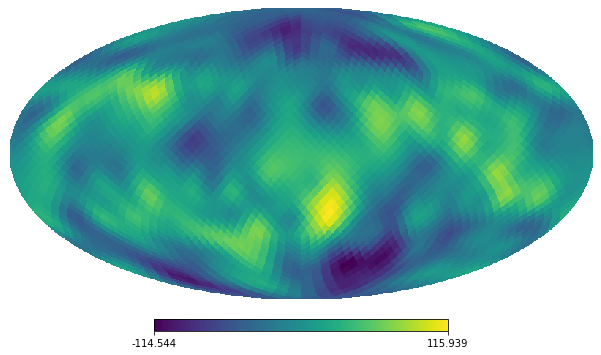

In [19]:
# Equal for all the realizations (same input map and model)

hp.mollview(Inpainted_Map_0[0], title = "")
hp.mollview(Inpainted_Map_10[0], title = "")

**Plotting stochastic part (second term in right side of eq. 2.13 in the [paper](https://arxiv.org/abs/2405.06820))**

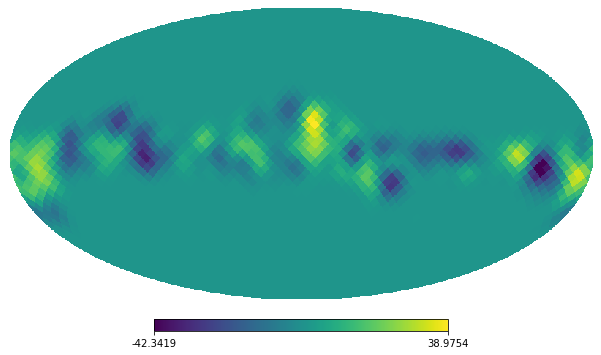

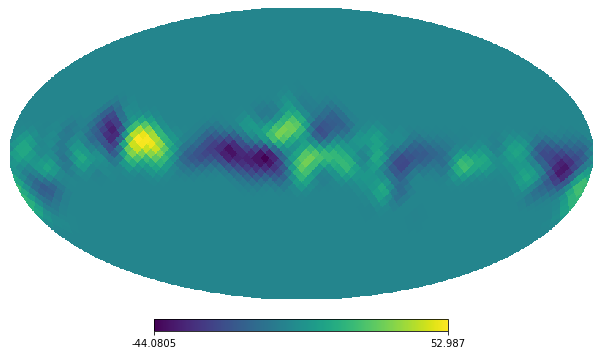

In [20]:
hp.mollview(Inpainted_Map_0[1], title = "")
hp.mollview(Inpainted_Map_10[1], title = "")

## Polarization case: ##

**We generate a new config file:**

In [21]:
Cls = "./docs/Cls_TTEEBBTE_ns_16_fwhm_640.npy"
Nside = 16
Lmax = 48
Pol = True
TPol = True
Out_PATH = "./docs/example_matrix/polarization/"
Inp_In_PATH = "./docs/"
Inp_Out_PATH = "./docs/example_inpainted_maps/polarization/"
In_Name = "example_map_TQU.fits"
Num_Sims = 20
Single = True
No_Z = False
Cons_Uncons = True
Fields = 3
Zbar_PATH = None
I_Mask = "./docs/example_masks/example_I_mask.fits"
P_Mask = "./docs/example_masks/example_P_mask.fits"
Chunks = 768
job_name = None
env = None
Noise_Level = 0.00001
DP = True
local = True
ntasks_cov = 4
ntasks_inp = 4


Global_Path = "/media/christian98/Seagate/Doctorado/Proyectos/Inpainting/CMBPAInT/CMBPAInT/"

**Generate an instace of CMBPAInT class:**

In [22]:
Inpainting_Data = CMBP.CMB_PAInT(Cls, Nside, Lmax, Out_PATH, Inp_In_PATH, Inp_Out_PATH, In_Name, Num_Sims, Single, No_Z, Cons_Uncons, Fields, Zbar_PATH, I_Mask, Chunks, job_name, env, Noise_Level = Noise_Level, DP = DP, local = local, ntasks_cov = ntasks_cov, P_Mask = P_Mask, ntasks_inp = ntasks_inp, Pol = Pol, TPol = TPol)

**Plotting polarization mask:**

Total number of pixels:  (3072,)
Number of masked pixels:  1119


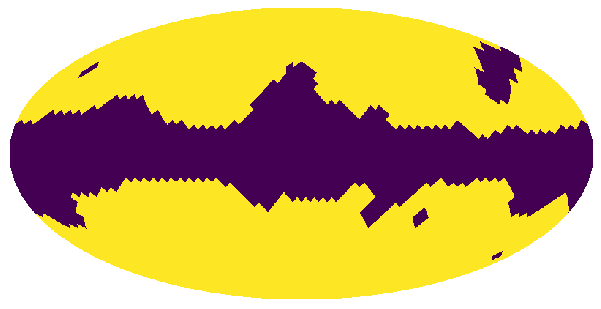

In [23]:
import healpy as hp
import numpy as np

Mask = hp.read_map(P_Mask)
print("Total number of pixels: ", Mask.shape)
print("Number of masked pixels: ", len(np.where(Mask == 0)[0]))
hp.mollview(Mask, title = "", cbar = False)

**Plotting input QU maps:**

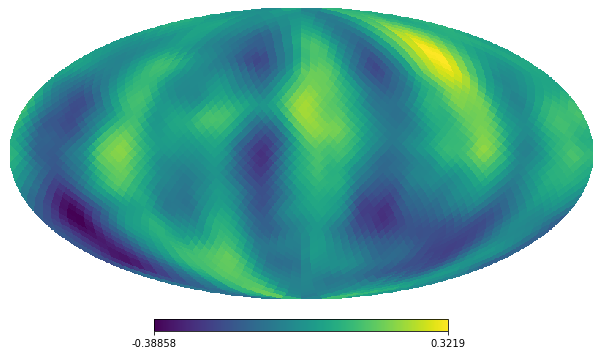

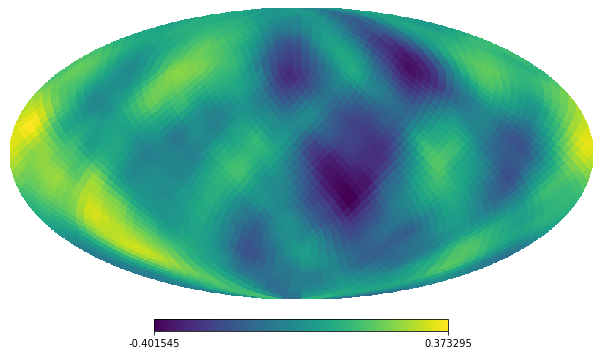

In [25]:
import os

Map = hp.read_map(os.path.join(Inp_In_PATH, In_Name), field = (1, 2))
hp.mollview(Map[0], title = "")
hp.mollview(Map[1], title = "")

**We generate the configuration file in the folder where covariance matrix will be computed:**

In [27]:
Inpainting_Data.generate_config_file()

### Compute covariance matrix: ###

In [32]:
Inpainting_Data.calculate_covariance_matrix(global_path = Global_Path)

























  0%|          | 0/768 [00:00<?, ?it/s]

Number of processes:  4
Pol:  True
TPol:  True


 16%|█▋        | 126/768 [00:48<04:12,  2.54it/s]

MPI Task 0/4: Memory usage = 201.77 MB


 46%|████▌     | 353/768 [02:26<02:56,  2.36it/s]

MPI Task 1/4: Memory usage = 237.45 MB


 74%|███████▎  | 566/768 [04:04<01:32,  2.18it/s]

MPI Task 2/4: Memory usage = 276.38 MB


100%|██████████| 768/768 [05:42<00:00,  1.99it/s]

MPI Task 3/4: Memory usage = 310.34 MB


100%|██████████| 768/768 [05:46<00:00,  2.21it/s]


**Load pixel covariance matrix:**

In [33]:
Matrix_T = np.load(os.getcwd()+"/docs/example_matrix/polarization/Cov_TT_lmax_48.npy")
Matrix_Q = np.load(os.getcwd()+"/docs/example_matrix/polarization/Cov_QQ_lmax_48.npy")
print(Matrix_T)
print(Matrix_Q)

[[1422.14523003    0.            0.         ...    0.
     0.            0.        ]
 [1343.80455374 1422.14523003    0.         ...    0.
     0.            0.        ]
 [1272.7491114  1343.80455374 1422.14523003 ...    0.
     0.            0.        ]
 ...
 [ 248.76765106  247.44534008  248.76765106 ... 1422.14523003
     0.            0.        ]
 [ 250.09099317  248.76765106  247.44534008 ... 1343.80455374
  1422.14523003    0.        ]
 [ 248.76765106  250.09099317  248.76765106 ... 1272.7491114
  1343.80455374 1422.14523003]]
[[ 0.01880727  0.          0.         ...  0.          0.
   0.        ]
 [-0.0184286   0.01880727  0.         ...  0.          0.
   0.        ]
 [ 0.01808348 -0.0184286   0.01880727 ...  0.          0.
   0.        ]
 ...
 [-0.0031118   0.00311551 -0.0031118  ...  0.01880727  0.
   0.        ]
 [ 0.00310811 -0.0031118   0.00311551 ... -0.0184286   0.01880727
   0.        ]
 [-0.0031118   0.00310811 -0.0031118  ...  0.01808348 -0.0184286
   0.01880727]]


**We add regularization noise to the input map (0.00001% of the matrix diagonal element):**

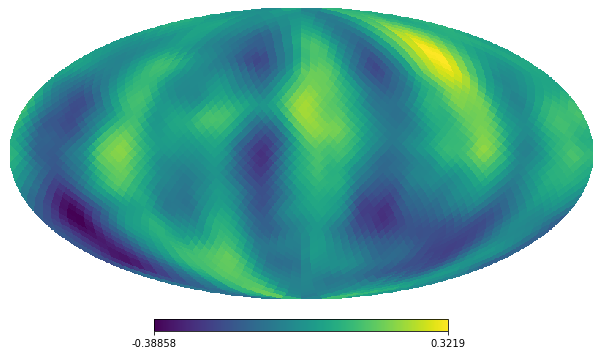

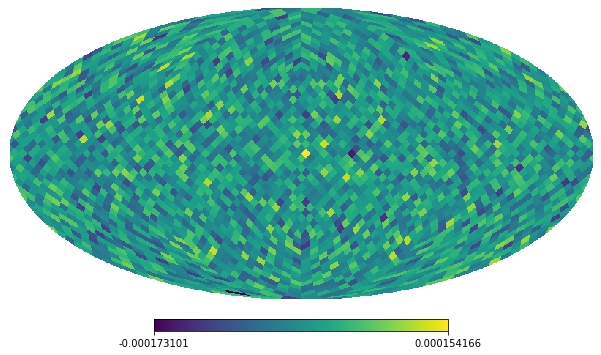

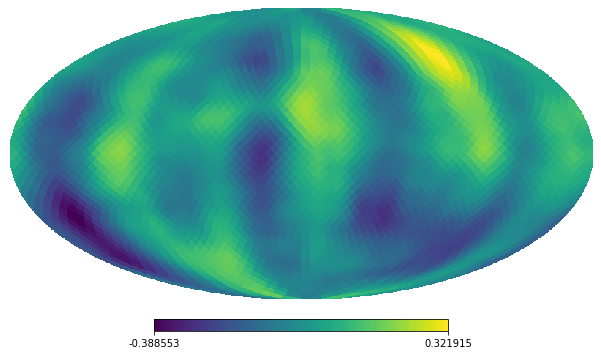

In [34]:
Var_T = Matrix_T[0, 0]
Var_Pol = Matrix_Q[0, 0]
npix = hp.nside2npix(16)

Reg_Noise_T = np.random.normal(0, np.sqrt(0.00001/100*Var_T), npix)
Reg_Noise_Q = np.random.normal(0, np.sqrt(0.00001/100*Var_Pol), npix)
Reg_Noise_U = np.random.normal(0, np.sqrt(0.00001/100*Var_Pol), npix)

Input_Map = hp.read_map(os.getcwd()+"/docs/example_map_TQU.fits", field = (0, 1, 2))

Inp_Map = np.zeros((3, npix))

Inp_Map[0] = Input_Map[0]+Reg_Noise_T
Inp_Map[1] = Input_Map[1]+Reg_Noise_Q
Inp_Map[2] = Input_Map[2]+Reg_Noise_U

hp.mollview(Input_Map[1], title = "")
hp.mollview(Reg_Noise_Q, title = "")
hp.mollview(Inp_Map[1], title = "")

hp.write_map(os.getcwd()+"/docs/example_map_TQU_adding_reg_noise.fits", Inp_Map, dtype = np.float64, overwrite = True)

### Compute Cholesky decomposition: ###

In [35]:
Inpainting_Data.calculate_chol(global_path = Global_Path)







/home/christian98/miniconda3/envs/Doctorado/lib/python3.7/site-packages/dask/array/core.py:4465: PerformanceWarning: Increasing number of chunks by factor of 13
  **blockwise_kwargs,
/home/christian98/miniconda3/envs/Doctorado/lib/python3.7/site-packages/dask/array/core.py:4465: PerformanceWarning: Increasing number of chunks by factor of 13
  **blockwise_kwargs,


Precision: double


### Inpaint maps: ###

In [36]:
Inpainting_Data.calculate_inp(global_path = Global_Path)

Single sky. Number of realizations:  20
L block reading...
MPI Task 2/4: Memory usage = 434.91 MB
L block reading...
MPI Task 0/4: Memory usage = 435.36 MB
L block reading...
MPI Task 3/4: Memory usage = 435.45 MB
L block reading...
MPI Task 1/4: Memory usage = 434.78 MB
Starting Z computation...
Z computation done!
R and Lbar blocks reading...
MPI Task 0/4: Memory usage = 399.34 MB
R and Lbar blocks reading...
MPI Task 1/4: Memory usage = 398.30 MB
R and Lbar blocks reading...
MPI Task 2/4: Memory usage = 398.09 MB
R and Lbar blocks reading...
MPI Task 3/4: Memory usage = 397.91 MB
Starting inpainting...


100%|██████████| 5/5 [00:00<00:00, 10.25it/s]


Inpainting done!


### Plot some maps: ###

In [38]:
Inpainted_Map_T_0 = hp.read_map(os.getcwd()+"/docs/example_inpainted_maps/polarization/Inpainted_Maps/Inpainted_T_0.fits", field = (0, 1, 2))
Inpainted_Map_T_10 = hp.read_map(os.getcwd()+"/docs/example_inpainted_maps/polarization/Inpainted_Maps/Inpainted_T_10.fits", field = (0, 1, 2))

Inpainted_Map_Q_0 = hp.read_map(os.getcwd()+"/docs/example_inpainted_maps/polarization/Inpainted_Maps/Inpainted_Q_0.fits", field = (0, 1, 2))
Inpainted_Map_Q_10 = hp.read_map(os.getcwd()+"/docs/example_inpainted_maps/polarization/Inpainted_Maps/Inpainted_Q_10.fits", field = (0, 1, 2))

Inpainted_Map_U_0 = hp.read_map(os.getcwd()+"/docs/example_inpainted_maps/polarization/Inpainted_Maps/Inpainted_U_0.fits", field = (0, 1, 2))
Inpainted_Map_U_10 = hp.read_map(os.getcwd()+"/docs/example_inpainted_maps/polarization/Inpainted_Maps/Inpainted_U_10.fits", field = (0, 1, 2))

Input = hp.read_map(os.getcwd()+"/docs/example_map_TQU_adding_reg_noise.fits")

**Plotting constrained part (first term in right side of eq. 2.13 in the [paper](https://arxiv.org/abs/2405.06820))**

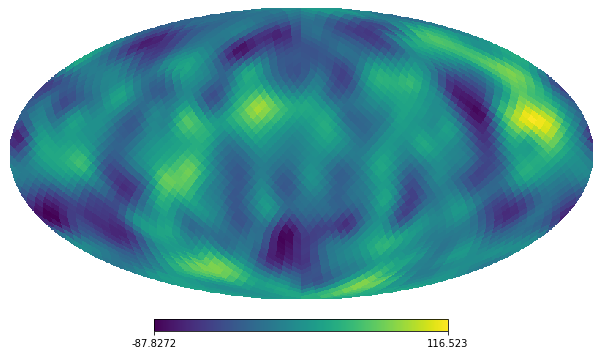

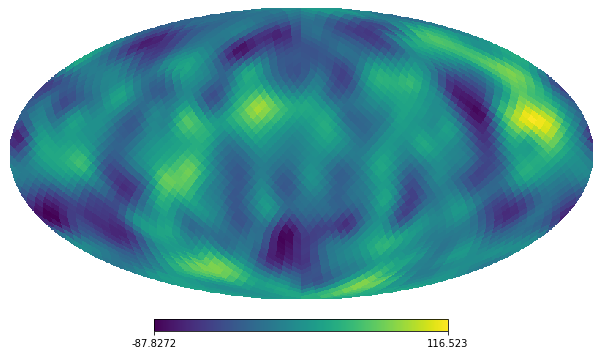

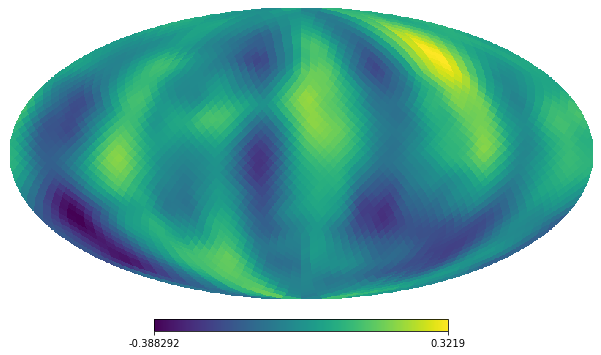

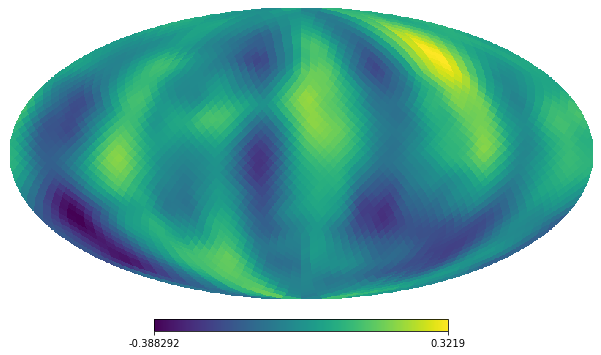

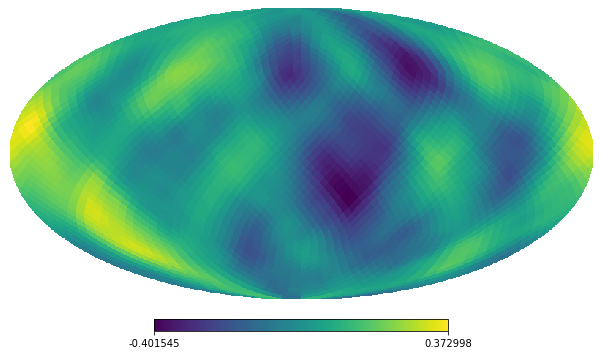

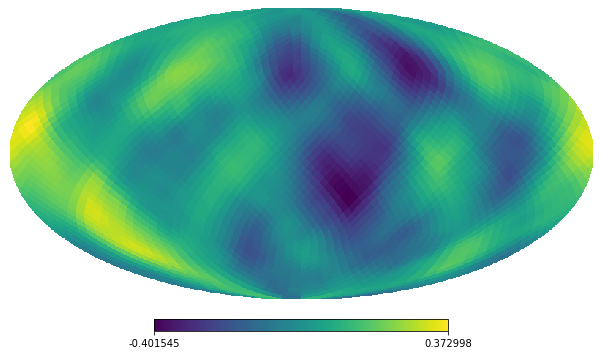

In [40]:
# Equal for all the realizations (same input map)

hp.mollview(Inpainted_Map_T_0[0], title = "")
hp.mollview(Inpainted_Map_T_10[0], title = "")

hp.mollview(Inpainted_Map_Q_0[0], title = "")
hp.mollview(Inpainted_Map_Q_10[0], title = "")

hp.mollview(Inpainted_Map_U_0[0], title = "")
hp.mollview(Inpainted_Map_U_10[0], title = "")

**Plotting stochastic part (second term in right side of eq. 2.13 in the [paper](https://arxiv.org/abs/2405.06820))**

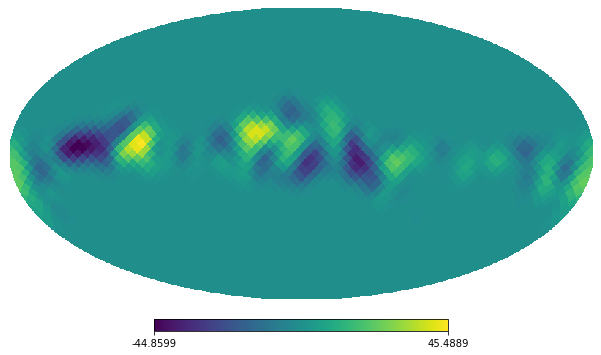

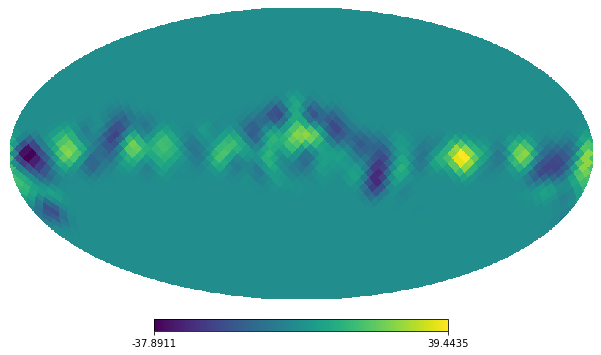

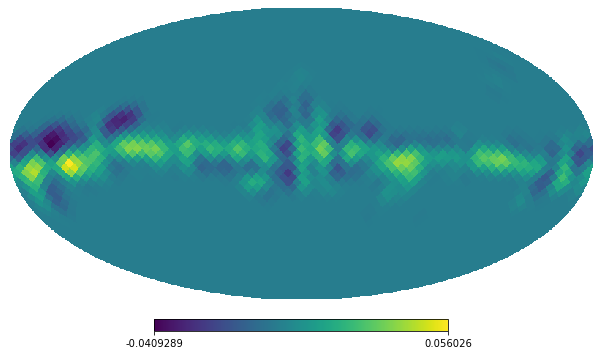

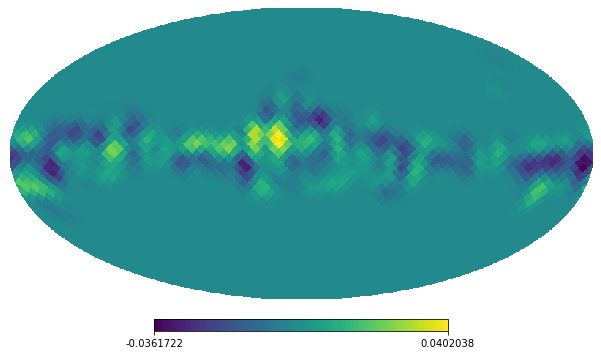

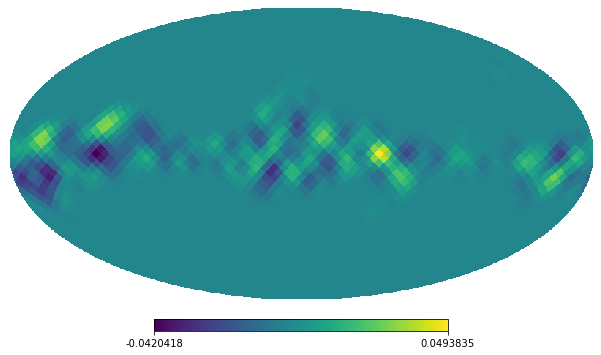

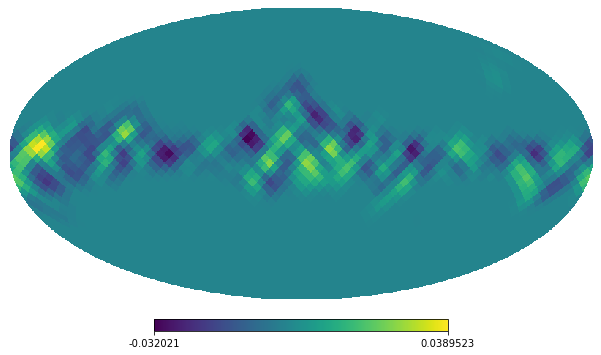

In [41]:
hp.mollview(Inpainted_Map_T_0[1], title = "")
hp.mollview(Inpainted_Map_T_10[1], title = "")

hp.mollview(Inpainted_Map_Q_0[1], title = "")
hp.mollview(Inpainted_Map_Q_10[1], title = "")

hp.mollview(Inpainted_Map_U_0[1], title = "")
hp.mollview(Inpainted_Map_U_10[1], title = "")